# Emergency - 911 Calls- Data Cleaning and Exploratory Data Analysis with descriptive statistics

In [1]:
import numpy as np #for mathematical manipulation
import pandas as pd #for database manipulation
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #better plotting library
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/911.csv')

### Data Cleaning

First of all we need to remove unnecessary columns, to be specific the dummy variable e

In [3]:
data=data.drop('e',axis=1)

In [4]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN


### Descriptive Analysis

Descriptive statistics are bellow

In [22]:
data.describe()

,lat,lng,zip,Hour,Month
count,266543.000000,266543.000000,234049.000000,266543.000000,266543.000000
mean,40.159200,-75.316831,19235.194429,13.047613,6.289177
std,0.089112,0.161089,306.362554,5.642655,3.368198
min,30.333596,-95.595595,17555.000000,0.000000,1.000000
25%,40.100055,-75.393304,19038.000000,9.000000,3.000000
50%,40.144296,-75.304635,19401.000000,13.000000,6.000000
75%,40.229008,-75.211812,19446.000000,17.000000,9.000000
max,41.167156,-74.813670,77316.000000,23.000000,12.000000


Here lat, lng and zip code have no numerical representation, because they are used for map only. We can't say the meaning of mean value of the variables. Here some of the zip codes are missing. Missing values are represented by NaN

###### Variables and numbers of rows in the dataset.

In [23]:
data.shape

(266543, 13)

Total 9 variables and total 266543 rows are available in the dataset.

### Exploratory Data Analysis

We can make some frequency table and chart from the data to make a conclution about the data

###### The Top 10 Zipcodes for Emergency Calls

In [5]:
top_10_zip=pd.DataFrame(data['zip'].value_counts().head(10))
top_10_zip.reset_index(inplace=True)
top_10_zip.columns=['ZIP','Count']
top_10_zip

,ZIP,Count
0,19401.0,18401
1,19464.0,17937
2,19403.0,13366
3,19446.0,12828
4,19406.0,8820
5,19002.0,8367
6,19468.0,7860
7,19046.0,7340
8,19454.0,7274
9,19090.0,6999


###### Bar Chart of the top 20 zip codes

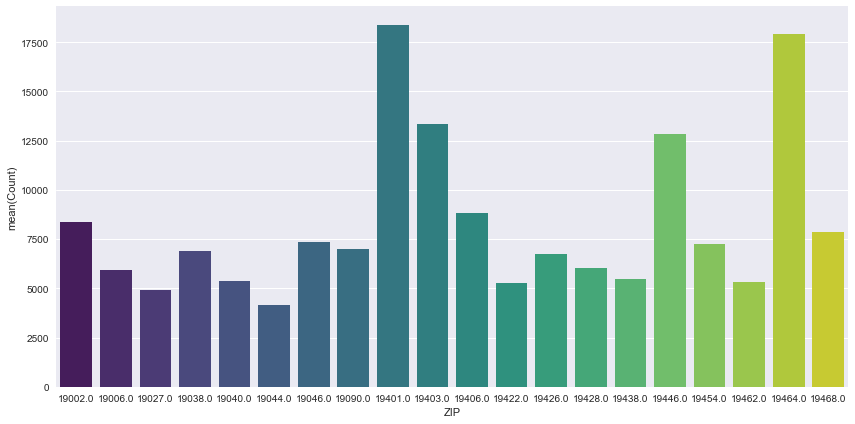

In [6]:
top_20_zip=pd.DataFrame(data['zip'].value_counts().head(20))
top_20_zip.reset_index(inplace=True)
top_20_zip.columns=['ZIP','Count']
fig1=plt.figure(figsize=(12,6))
sns.barplot(data=top_20_zip,x='ZIP',y='Count',palette="viridis")
fig1.tight_layout()

###### The Top 10 townships for 911 calls

In [7]:
top_10_twp=pd.DataFrame(data['twp'].value_counts().head(10))
top_10_twp.reset_index(inplace=True)
top_10_twp.columns=['Township','Count']
top_10_twp

,Township,Count
0,LOWER MERION,22886
1,ABINGTON,16379
2,NORRISTOWN,15421
3,UPPER MERION,14015
4,CHELTENHAM,12272
5,POTTSTOWN,11198
6,UPPER MORELAND,9023
7,LOWER PROVIDENCE,8786
8,PLYMOUTH,8042
9,HORSHAM,7535


###### Bar chart of the top 20 townships

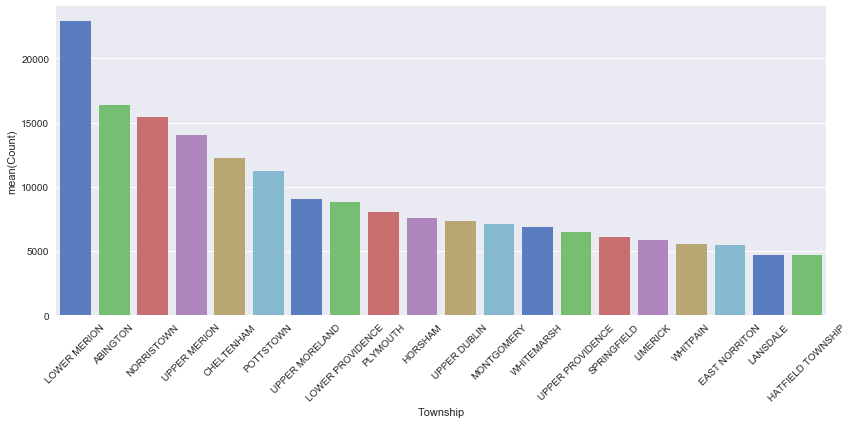

In [8]:
top_20_twp=pd.DataFrame(data['twp'].value_counts().head(20))
top_20_twp.reset_index(inplace=True)
top_20_twp.columns=['Township','Count']
fig2=plt.figure(figsize=(12,6))
g=sns.barplot(data=top_20_twp,x='Township',y='Count',palette="muted")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
fig2.tight_layout()

###### The unique reasons for emergency calls

In [9]:
data['title'].nunique()

130

###### Different types of Emergency - 911 Calls

In [24]:
data["title"].value_counts()

Traffic: VEHICLE ACCIDENT -             62218
Traffic: DISABLED VEHICLE -             18923
Fire: FIRE ALARM                        15091
EMS: RESPIRATORY EMERGENCY              13503
EMS: CARDIAC EMERGENCY                  13420
EMS: FALL VICTIM                        13410
EMS: VEHICLE ACCIDENT                   10857
Traffic: ROAD OBSTRUCTION -              8209
EMS: SUBJECT IN PAIN                     7503
EMS: HEAD INJURY                         7048
EMS: UNKNOWN MEDICAL EMERGENCY           4791
EMS: SYNCOPAL EPISODE                    4582
Fire: VEHICLE ACCIDENT                   4554
EMS: SEIZURES                            4418
EMS: GENERAL WEAKNESS                    4211
EMS: ALTERED MENTAL STATUS               3880
EMS: ABDOMINAL PAINS                     3846
EMS: MEDICAL ALERT ALARM                 3723
Fire: FIRE INVESTIGATION                 3681
EMS: OVERDOSE                            3416
EMS: UNCONSCIOUS SUBJECT                 3384
EMS: HEMORRHAGING                 

###### Main category of emergency calls

In [10]:
data['Reason'] = data["title"].apply(lambda x: x.split(':')[0])

In [11]:
data['Reason'].value_counts()

EMS        133234
Traffic     93400
Fire        39909
Name: Reason, dtype: int64

Bar chart fo the main categories

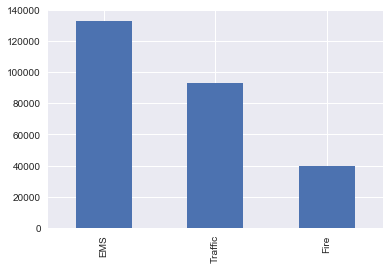

In [12]:
data['Reason'].value_counts().plot(kind='bar')

###### The distribution of main categories in the top 10 townships

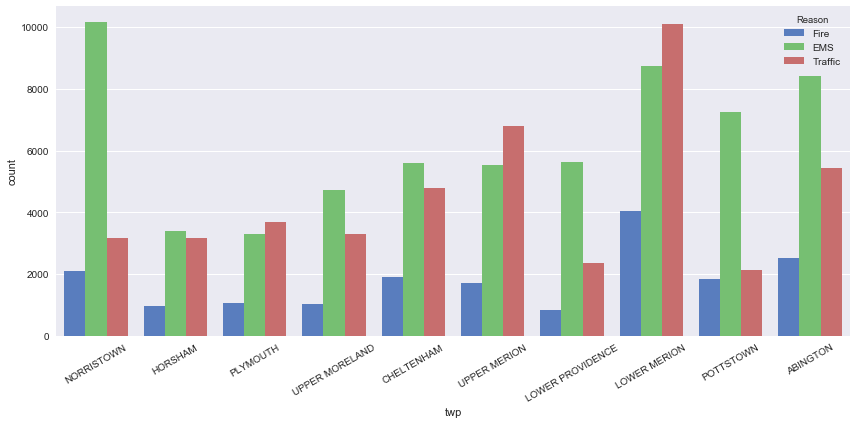

In [13]:
fig3=plt.figure(figsize=(12,6))
g=sns.countplot(data=data[(data['twp'].isin(top_10_twp['Township']))],x='twp',hue='Reason',palette='muted')
g_x=g.set_xticklabels(g.get_xticklabels(),rotation=30)
fig3.tight_layout()

###### TimeStamps Analysis

In [14]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [15]:
data['Hour']=data['timeStamp'].apply(lambda v:v.hour)
data['DayOfWeek']=data['timeStamp'].apply(lambda v:v.dayofweek)
data['Month']=data['timeStamp'].apply(lambda v:v.month)
data['Date']=data['timeStamp'].apply(lambda v:v.date())

In [16]:
# Map day values to proper strings
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['DayOfWeek']=data['DayOfWeek'].map(dmap1)

In [17]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,DayOfWeek,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,Thu,12,2015-12-10


###### the Distribution of Emergency Calls by Day of the Week

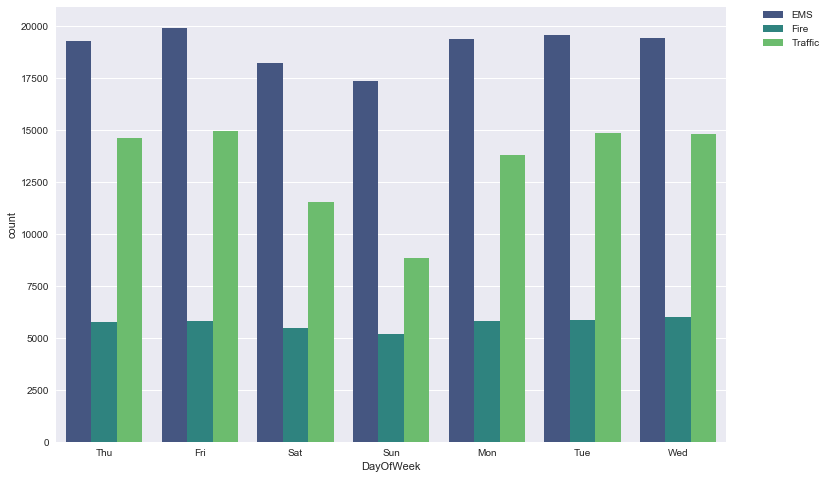

In [18]:
fig4=plt.figure(figsize=(12,8))
sns.countplot(x='DayOfWeek',hue='Reason',palette='viridis',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

there is a even variation in the the EMS calls, but a visible drop in Traffic Related Calls on Weekends, this is expected as there are fewer vehicles on the roads. Most other extremes are most likely a coincidence.

###### Distribution of Emergency Calls by Month

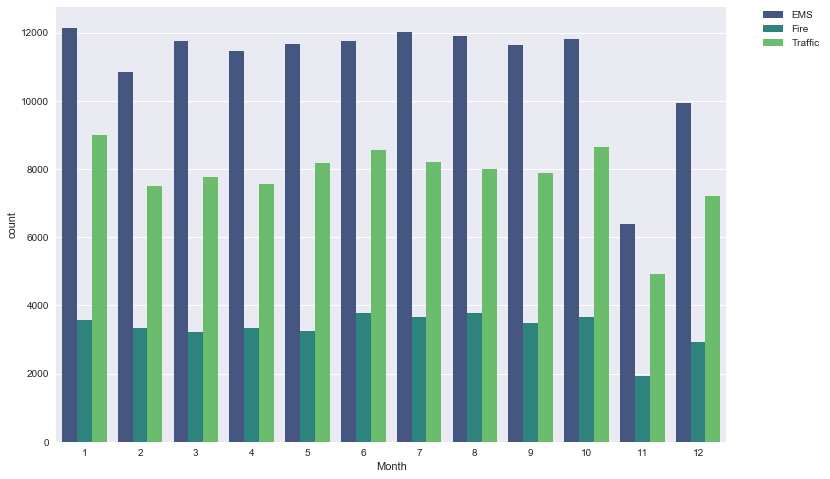

In [19]:
fig5=plt.figure(figsize=(12,8))
sns.countplot(x='Month',hue='Reason',palette='viridis',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now we can make a line plot

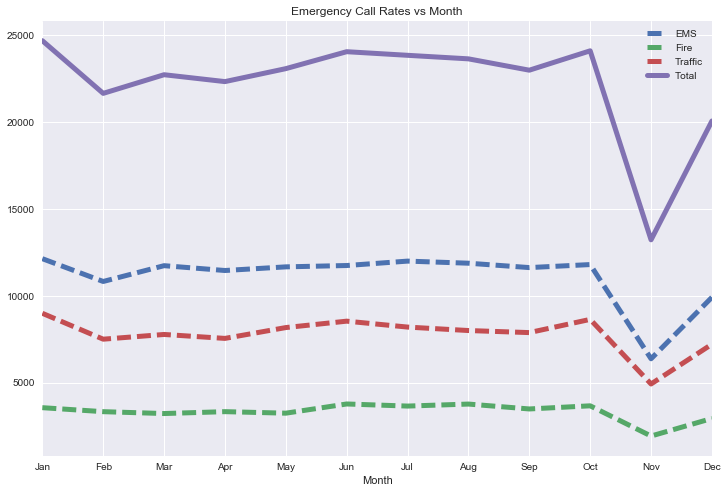

In [20]:
databyMonth_EMS = data[data['Reason']=='EMS'].groupby('Month').count()
databyMonth_Fire = data[data['Reason']=='Fire'].groupby('Month').count()
databyMonth_Traffic = data[data['Reason']=='Traffic'].groupby('Month').count()
databyMonth_Cumul = data.groupby('Month').count()

databyMonth_EMS['twp'].plot(figsize=(12,8),label='EMS',lw=5,ls='--')
databyMonth_Fire['twp'].plot(figsize=(12,8),label='Fire',lw=5,ls='--')
databyMonth_Traffic['twp'].plot(figsize=(12,8),label='Traffic',lw=5,ls='--')
databyMonth_Cumul['twp'].plot(figsize=(12,8),label='Total',lw=5)

fig=plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Emergency Call Rates vs Month")
plt.legend()

###### Regression line

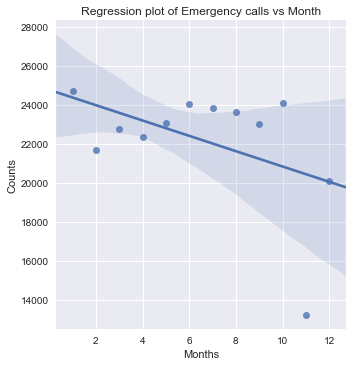

In [21]:
sns.lmplot(data=databyMonth_Cumul.reset_index(),x='Month',y='twp')
plt.title("Regression plot of Emergency calls vs Month")
plt.xlabel('Months')
plt.ylabel('Counts')